You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (`diabetes.csv`) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv(r"D:\Study\Data Science\Datasets\diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Here Glucose , BP , SkinThickness , insulin and BMI has minimum value 0 , which is not correct

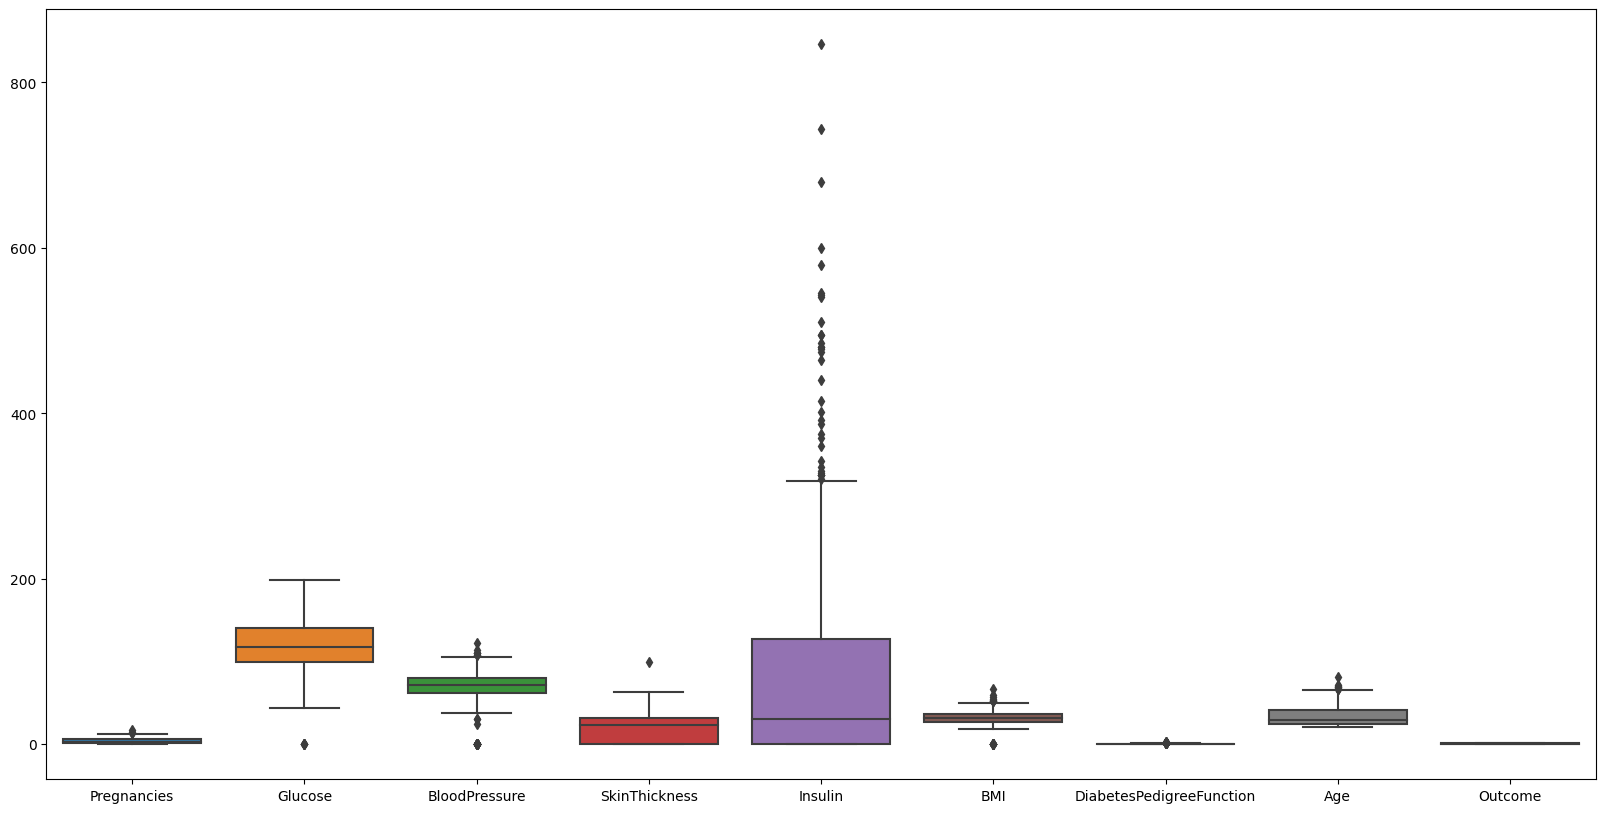

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

#### checking for missing values

In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- So we dont have any missing value
- But we have some unnatural values , so we have to solve it

In [30]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Now that we can see it, we have fixed it.

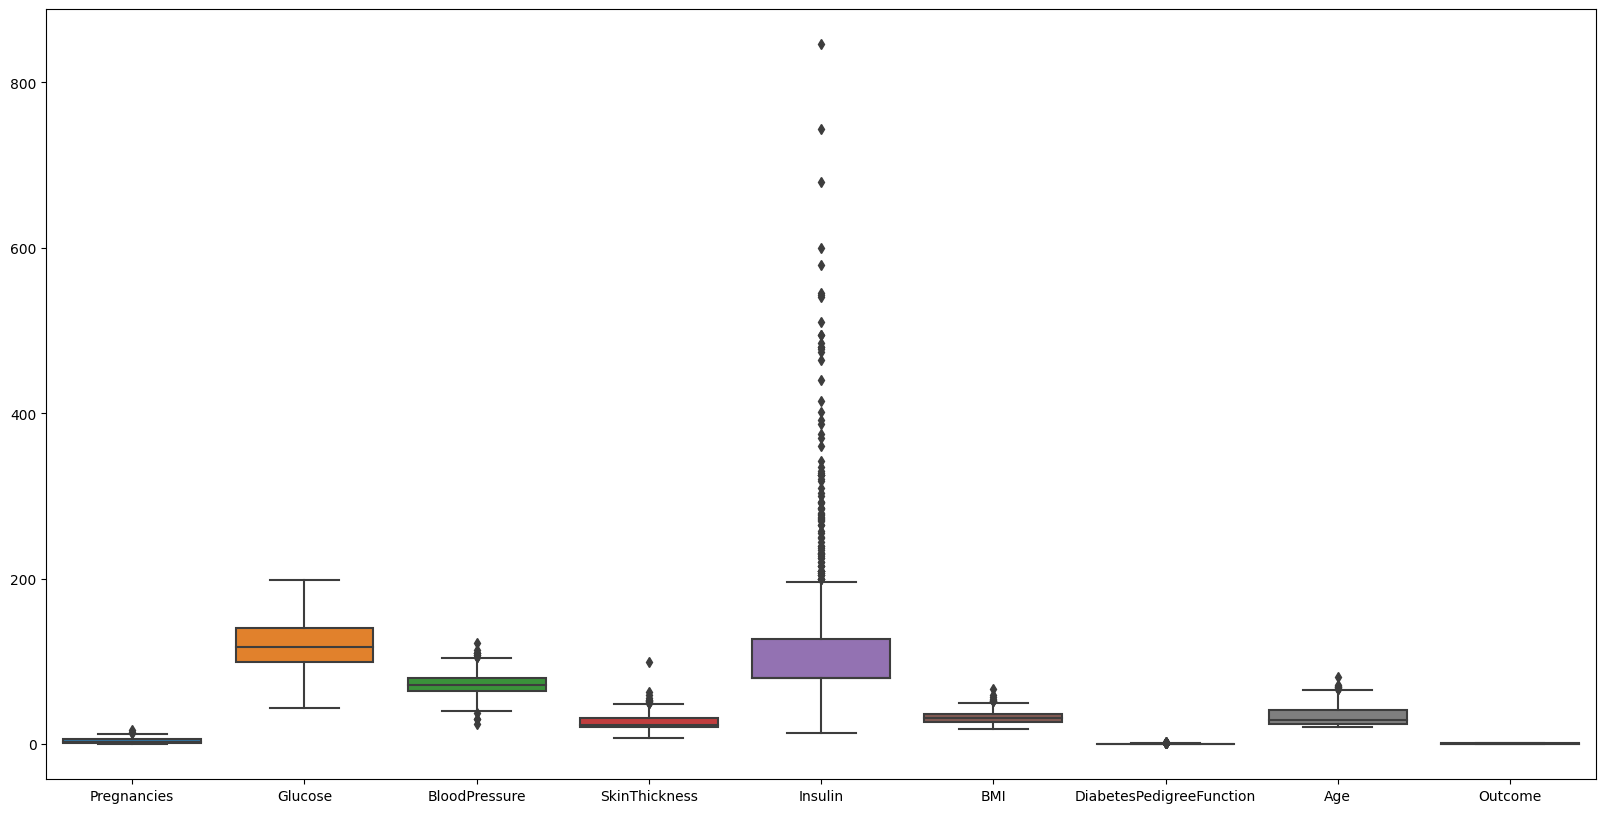

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

#### First of all , we have to make seperate independent variable and dependent varzile

In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.33,random_state=43)

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [40]:
from sklearn.tree import DecisionTreeClassifier

decision_classifer = DecisionTreeClassifier()

#### For hyperparameter tuning we are using Grid Search VC

In [41]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters = {
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10]
}

In [52]:
grid_obj = GridSearchCV(decision_classifer,param_grid=parameters,cv=5)

In [53]:
grid_obj.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [54]:
grid_obj.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [55]:
grid_obj.best_score_

0.7232941176470589

#### Now making model with best params

In [56]:
decision_classifier_model = DecisionTreeClassifier(criterion="gini",max_depth=5,splitter="best")

In [57]:
decision_classifier_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [58]:
y_pred = decision_classifier_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
score = accuracy_score(y_pred,y_test)
print(score)
report = classification_report(y_pred,y_test)
print(report)

0.7300970873786408
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       360
           1       0.54      0.63      0.58       155

    accuracy                           0.73       515
   macro avg       0.69      0.70      0.69       515
weighted avg       0.74      0.73      0.73       515



#### for confusion metix

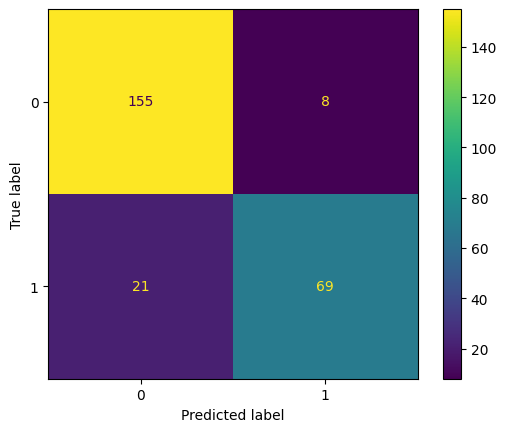

In [75]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_train,decision_classifier_model.predict(X_train))

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

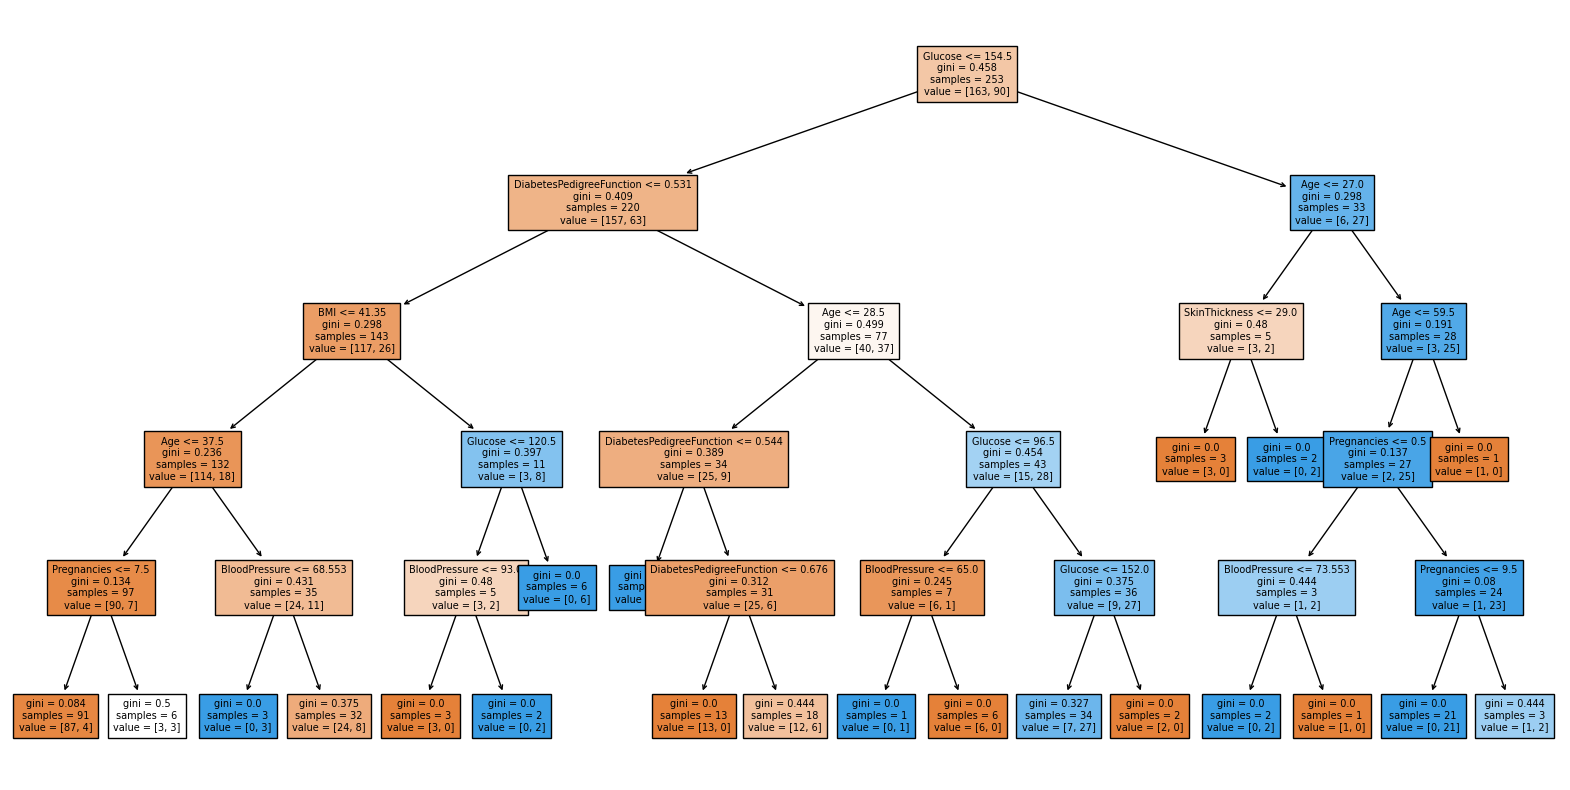

In [86]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(decision_classifier_model,filled=True,feature_names=X_train.columns,fontsize=7)
plt.show()

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [87]:
new_data = [[3,141,78,32,200,39,0.390,30]]

In [88]:
new_predicted_data = decision_classifier_model.predict(new_data)

C:\Users\sadar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [91]:
new_predicted_data[0]

0